2121728/2110848 [==============================] - 0s 0us/step
Category :  46
Learnning Data :  8982
Testing Data :  2246
71/71 [==============================] - 2s 24ms/step - loss: 1.4400 - accuracy: 0.7039

Accuracy: 0.7039


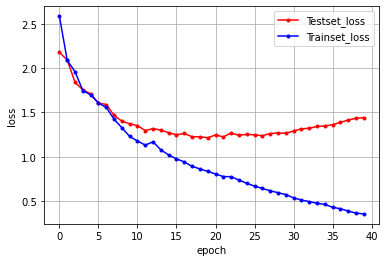

In [ ]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import reuters #로이터 뉴스 셋 불러오기
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=10000, test_split=0.2)

category = numpy.max(Y_train) + 1
print("Category : ",category,)
print("Learnning Data : ",len(X_train))
print("Testing Data : ",len(X_test))

x_train = sequence.pad_sequences(X_train, maxlen=100) #단어의 수를 100개로 결정
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train) #one-hot encoding
y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Embedding(1000, 100)) #불러온 단어의 총 갯수, 기사당 단어의 수
model.add(LSTM(100, activation='tanh')) #기사당 단어의 수
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test, y_test), verbose=0)

# 테스트 정확도 출력
print("\nAccuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
